In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <span style="color:#008fb3">Task 1: Retrieving and Preparing the Data

# <span style="color:#008fb3">Data Retrieving

The CSV data is loaded from the file and assigned to a data frame `mice_protein_data` using pandas `read_csv`.  The dimensionality of the data frame is found using `shape` method and from that it is found data frame contains 1080 observations and 82 attributes. First 5 rows of the data frame are displayed using `head` method.

In [2]:
mice_protien = pd.read_csv('Data_Cortex_Nuclear.csv')

In [3]:
mice_protien.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
mice_protien.shape

(1080, 82)

## <span style="color:#008fb3">Data Preparation

A copy of the original dataset is assigned to mice_protein_data, to keep the original data set unaltered. The data types of each column are found using `dtypes`.

In [5]:
mice_protien_data = mice_protien.copy()

In [6]:
mice_protien_data.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [8]:
mice_protien_data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
t-SC-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

## <span style="color:#008fb3">Handling Missing values

Count of missing values in each column is found using `isnull` method. From the output it is found that only the numeric columns in the data set have missing values. These missing values are replaced by the mean of it's corresponding columns using `fillna` method.

In [9]:
numeric_cols = mice_protien_data.select_dtypes(include=['float64' , 'int64']).columns.tolist()[:-1]

In [10]:
for col in mice_protien_data:
    print("Number of missing values in column:",col)
    print(mice_protien_data[col].isnull().sum())

Number of missing values in column: MouseID
0
Number of missing values in column: DYRK1A_N
3
Number of missing values in column: ITSN1_N
3
Number of missing values in column: BDNF_N
3
Number of missing values in column: NR1_N
3
Number of missing values in column: NR2A_N
3
Number of missing values in column: pAKT_N
3
Number of missing values in column: pBRAF_N
3
Number of missing values in column: pCAMKII_N
3
Number of missing values in column: pCREB_N
3
Number of missing values in column: pELK_N
3
Number of missing values in column: pERK_N
3
Number of missing values in column: pJNK_N
3
Number of missing values in column: PKCA_N
3
Number of missing values in column: pMEK_N
3
Number of missing values in column: pNR1_N
3
Number of missing values in column: pNR2A_N
3
Number of missing values in column: pNR2B_N
3
Number of missing values in column: pPKCAB_N
3
Number of missing values in column: pRSK_N
3
Number of missing values in column: AKT_N
3
Number of missing values in column: BRAF_N
3

In [11]:
numeric_cols = mice_protien_data.select_dtypes(include=['float64' , 'int64']).columns.tolist()[:-1]

In [12]:
for col in numeric_cols:
    col_mean = mice_protien_data[col].mean()
    mice_protien_data[col].fillna(col_mean, inplace = True)

In [13]:
mice_protien_data.isnull().sum().sum()

0

##  <span style="color:#008fb3">Sanity check : Handling impossible values

After having a close look into the data set, it is found that column `RRP1_N` has a value **-0.062007874000000004**, the redundant negative sign is removed for this.

In [14]:
nonNegative = False
for col in numeric_cols:
    if((mice_protien_data[col] < 0).any() == True):
        print("Column ",col,"has a negative number")
        nonNegative = True
if(nonNegative == False):
    print("None of the columns in Mice Protien has a non negative value")

Column  RRP1_N has a negative number


Finding the index and Updating the corresponding value without a negative sign.

In [15]:
mice_protien_data[mice_protien_data['RRP1_N'].lt(0)].index[0]

298

In [16]:
mice_protien_data['RRP1_N'].iloc[298]

-0.062007874000000004

From the output , it is infered that negative sign is due to data entry error, so it is replaced with without negative sign.

In [17]:
mice_protien_data.at[298,'RRP1_N'] = 0.062007874000000004

# <span style="color:#008fb3">Outliers

* From the box plot it is found that most of the numeric columns have outliers.
* The count of outliers following **tukey method**, it is found that there are **1551** outliers.
* So discarding outlier observation would lead to empty data.
* Imputing the outliers will manipulate the data, because outlier count is high.
* Thus, Outliers are not discarded or imputed.


Column Name DYRK1A_N


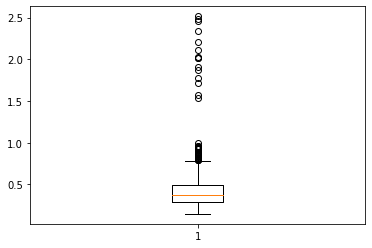


Column Name ITSN1_N


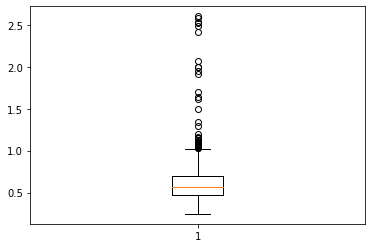


Column Name BDNF_N


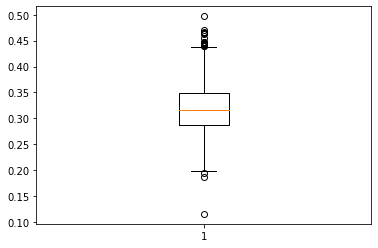


Column Name NR1_N


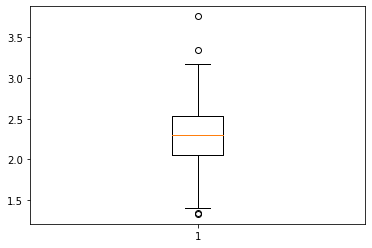


Column Name NR2A_N


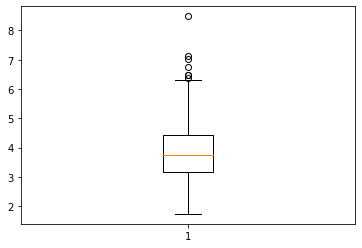


Column Name pAKT_N


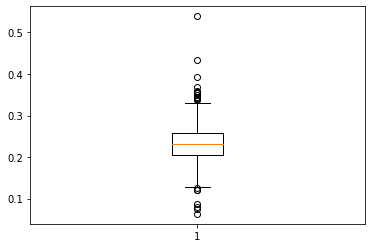


Column Name pBRAF_N


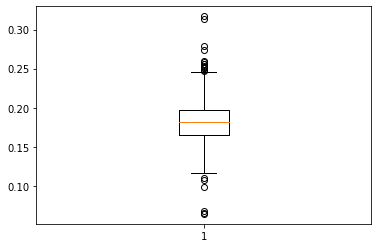


Column Name pCAMKII_N


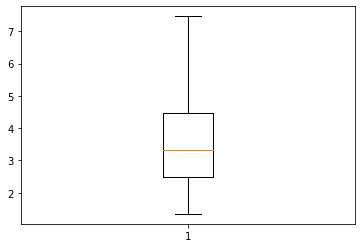


Column Name pCREB_N


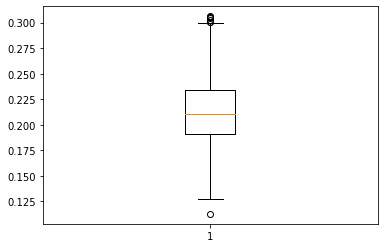


Column Name pELK_N


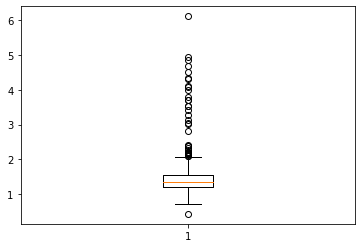


Column Name pERK_N


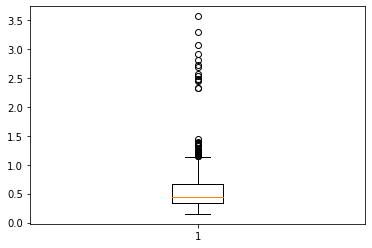


Column Name pJNK_N


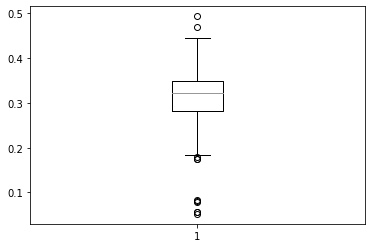


Column Name PKCA_N


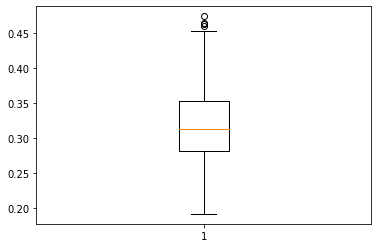


Column Name pMEK_N


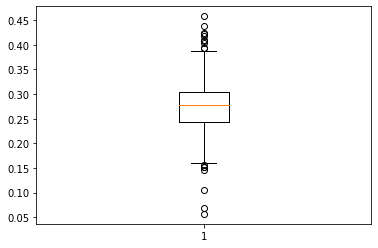


Column Name pNR1_N


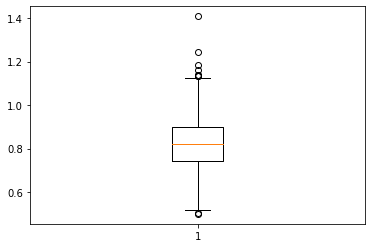


Column Name pNR2A_N


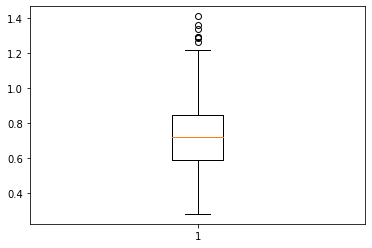


Column Name pNR2B_N


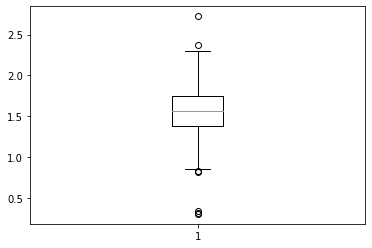


Column Name pPKCAB_N


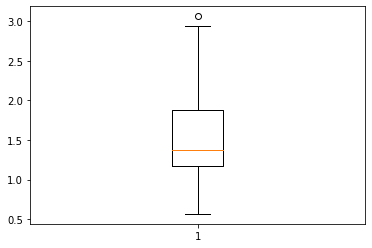


Column Name pRSK_N


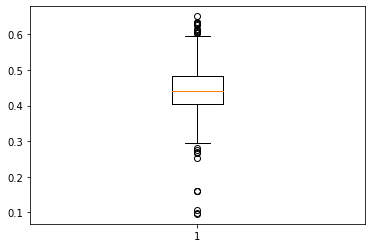


Column Name AKT_N


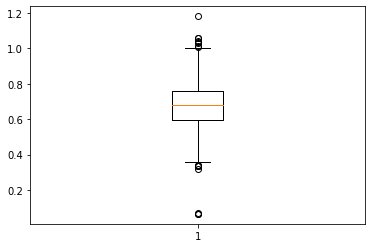


Column Name BRAF_N


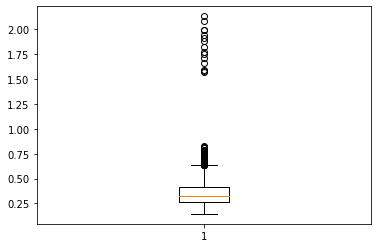


Column Name CAMKII_N


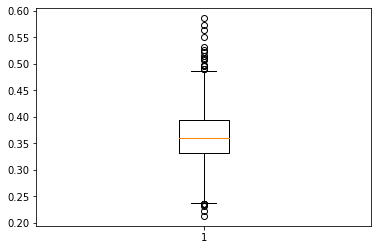


Column Name CREB_N


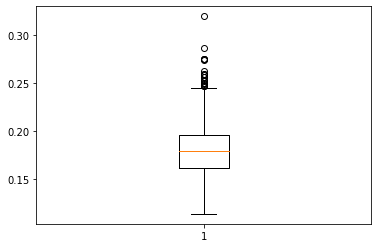


Column Name ELK_N


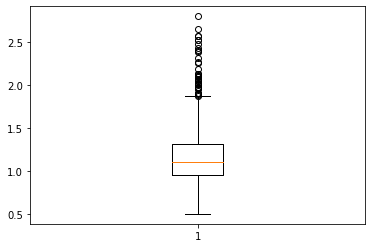


Column Name ERK_N


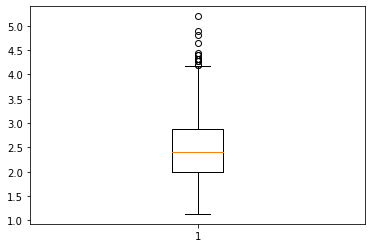


Column Name GSK3B_N


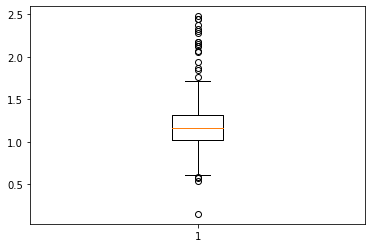


Column Name JNK_N


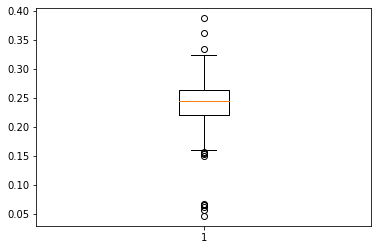


Column Name MEK_N


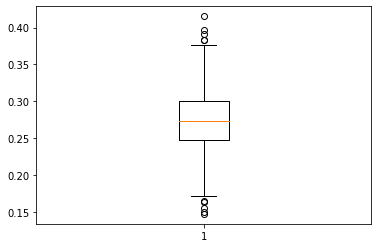


Column Name TRKA_N


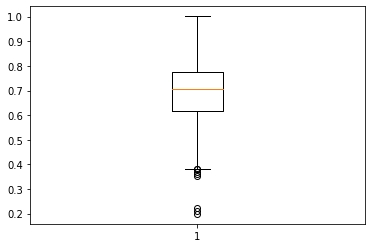


Column Name RSK_N


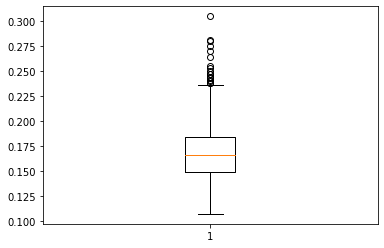


Column Name APP_N


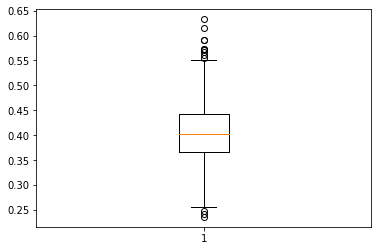


Column Name Bcatenin_N


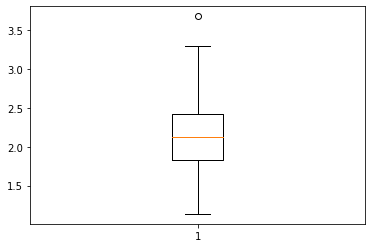


Column Name SOD1_N


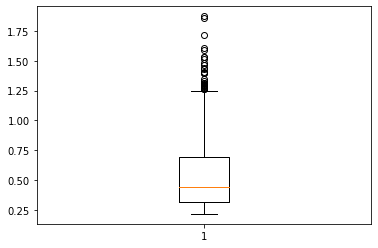


Column Name MTOR_N


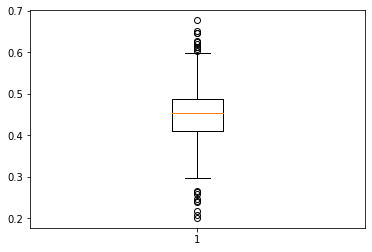


Column Name P38_N


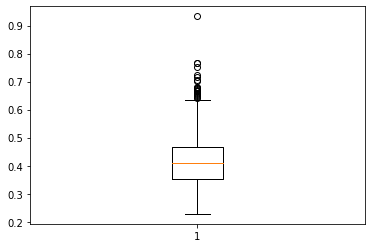


Column Name pMTOR_N


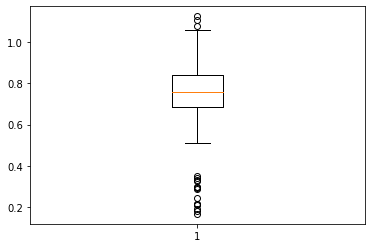


Column Name DSCR1_N


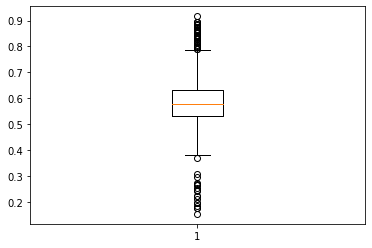


Column Name AMPKA_N


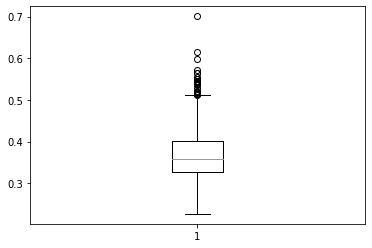


Column Name NR2B_N


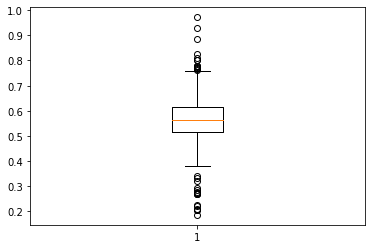


Column Name pNUMB_N


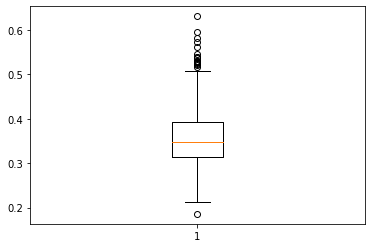


Column Name RAPTOR_N


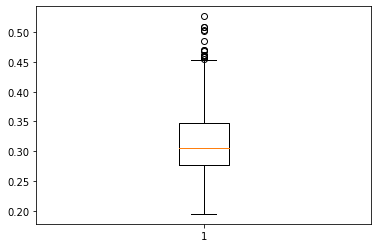


Column Name TIAM1_N


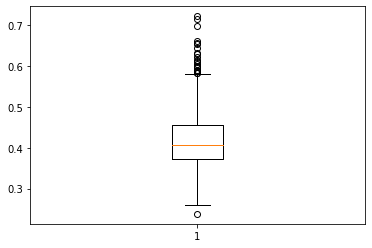


Column Name pP70S6_N


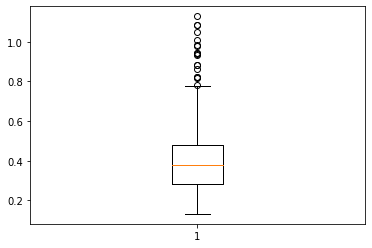


Column Name NUMB_N


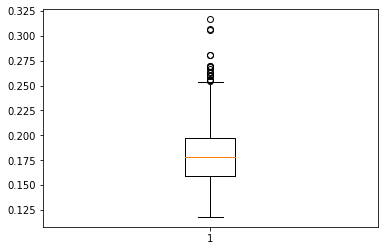


Column Name P70S6_N


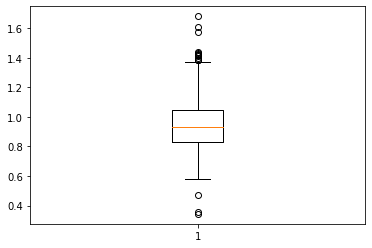


Column Name pGSK3B_N


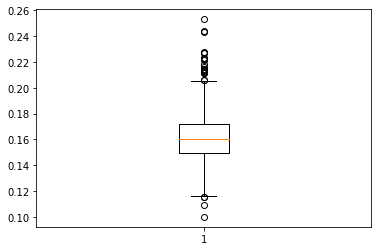


Column Name pPKCG_N


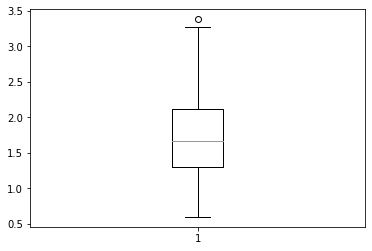


Column Name CDK5_N


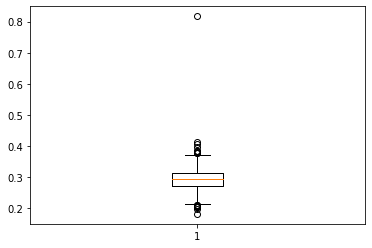


Column Name S6_N


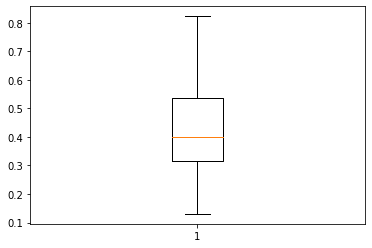


Column Name ADARB1_N


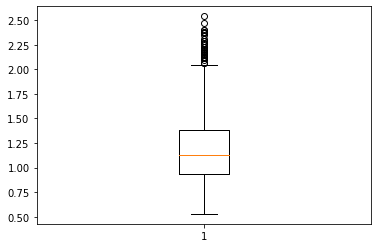


Column Name AcetylH3K9_N


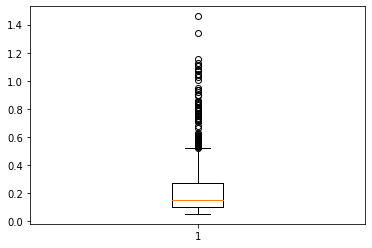


Column Name RRP1_N


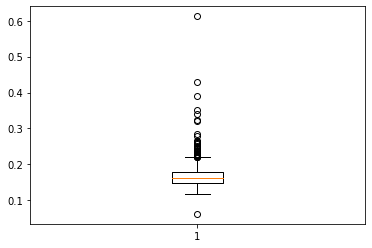


Column Name BAX_N


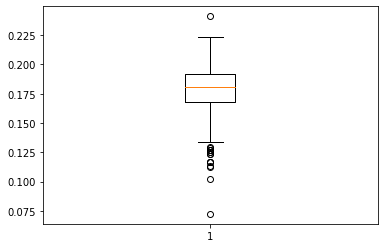


Column Name ARC_N


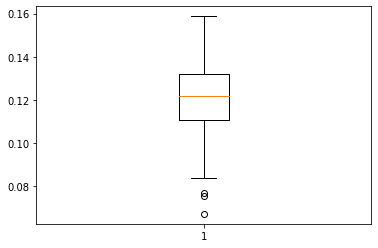


Column Name ERBB4_N


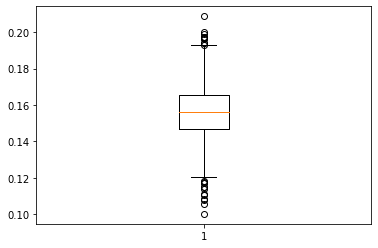


Column Name nNOS_N


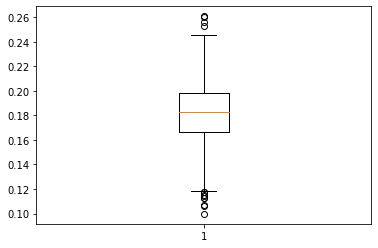


Column Name Tau_N


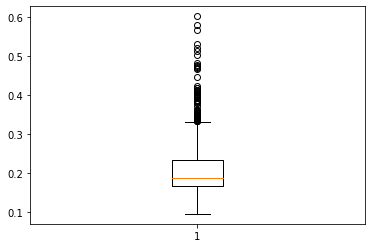


Column Name GFAP_N


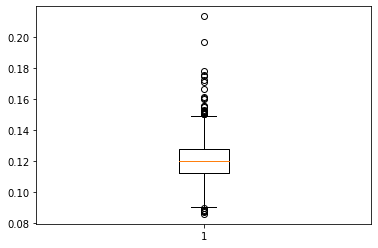


Column Name GluR3_N


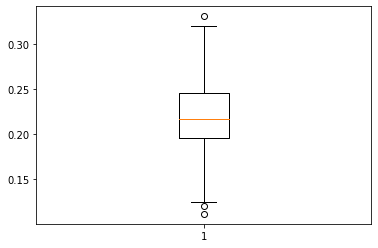


Column Name GluR4_N


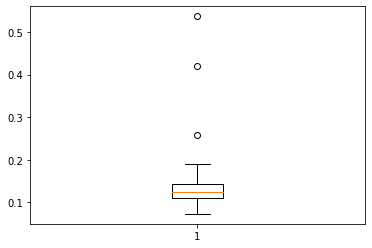


Column Name IL1B_N


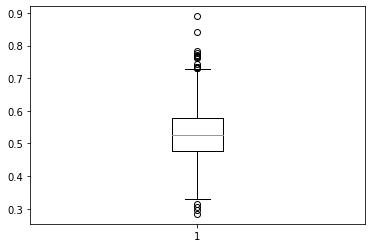


Column Name P3525_N


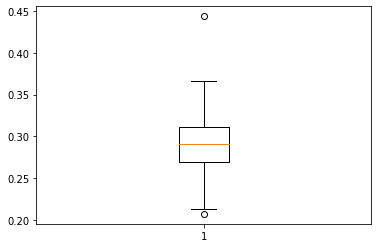


Column Name pCASP9_N


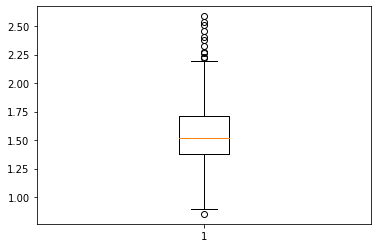


Column Name PSD95_N


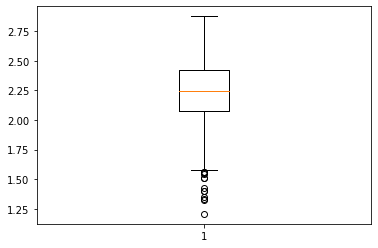


Column Name SNCA_N


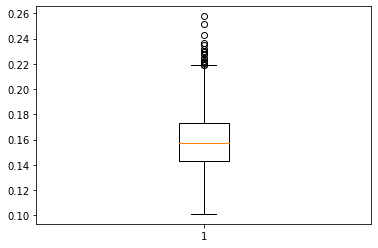


Column Name Ubiquitin_N


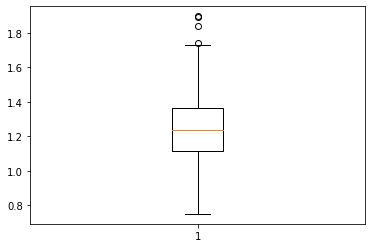


Column Name pGSK3B_Tyr216_N


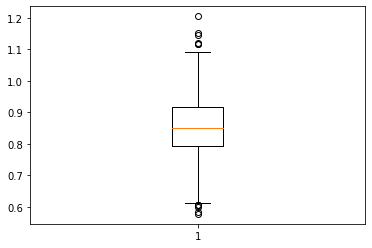


Column Name SHH_N


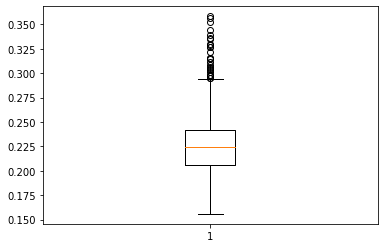


Column Name BAD_N


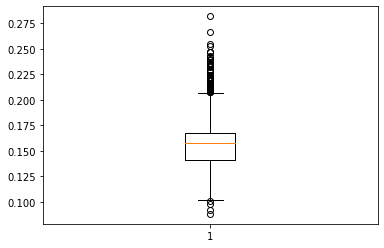


Column Name BCL2_N


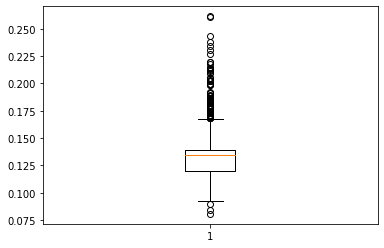


Column Name pS6_N


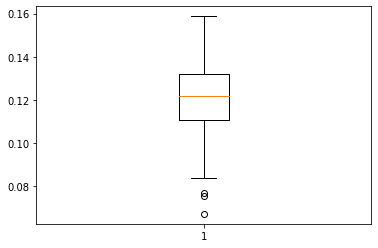


Column Name pCFOS_N


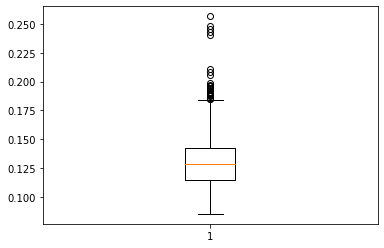


Column Name SYP_N


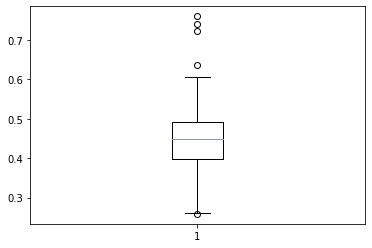


Column Name H3AcK18_N


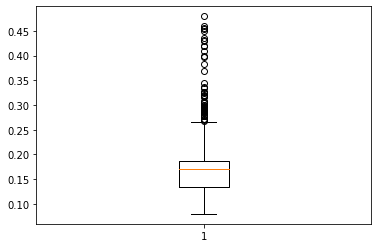


Column Name EGR1_N


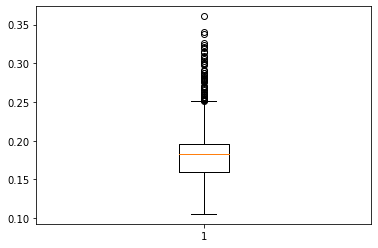


Column Name H3MeK4_N


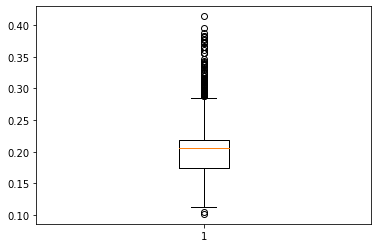

In [18]:
for col in numeric_cols:
    print('\nColumn Name' , col)
    plt.boxplot(mice_protien_data[col] )
    plt.show();

In [19]:
count_of_Outliers_list = []
all_cols = mice_protien.columns
for col in numeric_cols:
    Q1 = mice_protien[col].quantile(0.25)
    Q3 = mice_protien[col].quantile(0.75)
    IQR = Q3 - Q1
    idx = mice_protien[((mice_protien[col] < (Q1 - 1.5 * IQR)) | (mice_protien[col] > (Q3 + 1.5 * IQR)))] [all_cols].index
    temp = len(idx)
    count_of_Outliers_list.append(temp)

In [20]:
sum(count_of_Outliers_list)

1551

# <span style="color:#008fb3">Task 2.1: Explore each column

A function `descriptive_stat` is defined to find the descriptive statistics of each column which include 
    * Minimum value
    * Maximum value
    * Mean Value
    * Mode 
    * Median
    * Standard Deviation

In [21]:
def descriptive_stat(x):
    df = pd.DataFrame()
    df['MIN'] = [min(x)]
    df['MAX'] = [max(x)]
    df['MEAN'] = x.mean()
    df['MODE'] = x.mode()
    df['MEDIAN'] = x.median()
    df['SD'] = statistics.stdev(x)
    return df

### <span style="color:#008fb3">Exploring column `Class`

* A value counts of column `class` is found and corresponding bar plot is plotted.
* From the plot and value counts it is clear that count of class type **t-CS-s** is least when compared to other class types.
* Class **c-SC-m** and **c-CS-m** are highest with count of 150 each.

In [22]:
mice_protien_data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
t-SC-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

Text(0.5, 1.0, 'Plot 1:Different Classes Of Mice')

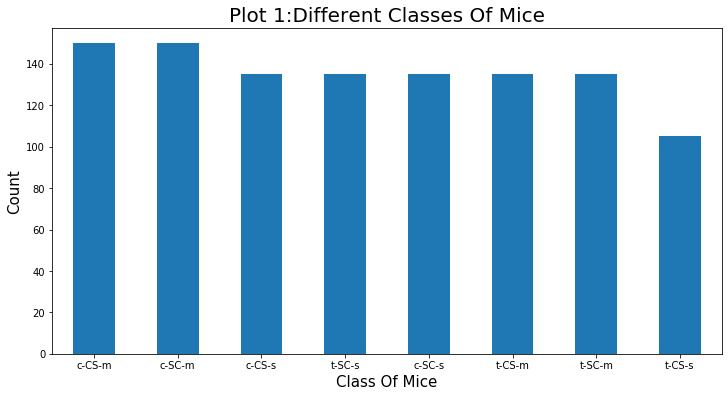

In [23]:
fig = plt.figure(figsize=[12,6])
ax =mice_protien_data['class'].value_counts().plot.bar()
ax.set_ylabel("Count",fontsize = 15)
ax.set_xlabel("Class Of Mice", fontsize = 15)
plt.xticks(rotation=0)
plt.title("Plot 1:Different Classes Of Mice", fontsize=20)

### <span style="color:#008fb3">Exploring column `pCAMKII_N`

* Descriptive statistics for column `pCAMKII_N` is found using the function defined `descriptive_stat`.
* Average expression level of protein `pCAMKII_N` is **3.537109**.
* From the output and plot , it is infered that expression level of `pCAMKII_N` is right skewed.


In [24]:
descriptive_stat(mice_protien_data['pCAMKII_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,1.343998,7.46407,3.537109,3.537109,3.329624,1.293368


Text(0.5, 0, 'Expression Level Of Protien pCAMKII_N')

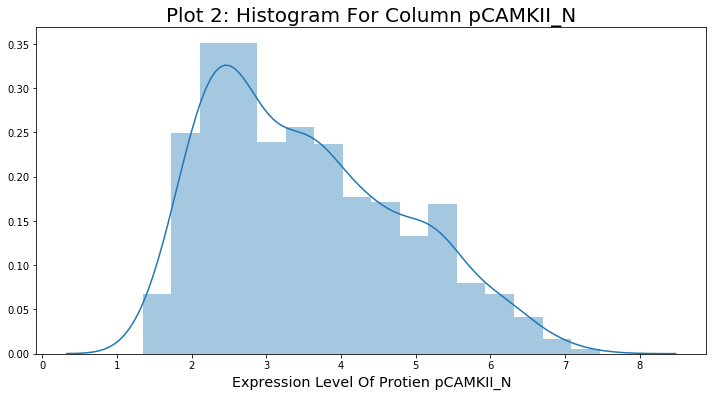

In [25]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['pCAMKII_N'],
             kde=True);
plt.title('Plot 2: Histogram For Column pCAMKII_N', fontsize=20)
plt.xlabel('Expression Level Of Protien pCAMKII_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `S6_N`

* The maximum and minimum value for column `S6_N` are 0.130206 and 0.822611 respectively.
* From the plot it is clear that column `S6_N` follows a right skewness.

In [26]:
descriptive_stat(mice_protien_data['S6_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.130206,0.822611,0.429226,0.130206,0.400999,0.13744


Text(0.5, 0, 'Expression Level Of Protien S6_N')

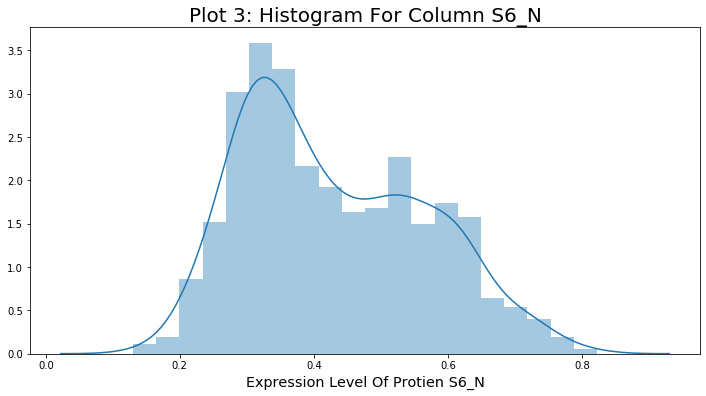

In [27]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['S6_N'],
             kde=True,
             bins=20);
plt.title('Plot 3: Histogram For Column S6_N', fontsize=20)
plt.xlabel('Expression Level Of Protien S6_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `NR1_N`

* The maximum and minimum value for column `NR1_N` are 1.330831 and 3.757641 respectively.
* From the plot it is clear that column `NR1_N` is symmetric.

In [28]:
descriptive_stat(mice_protien_data['NR1_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,1.330831,3.757641,2.297269,2.297269,2.297269,0.34681


Text(0.5, 0, 'Expression Level Of Protien NR1_N')

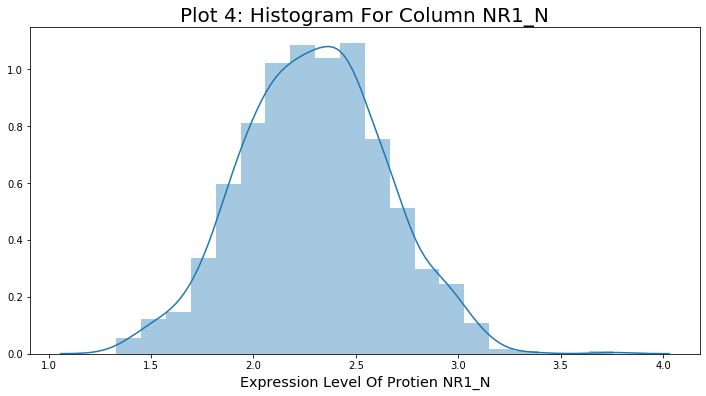

In [29]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['NR1_N'],
             kde=True,
             bins=20);
plt.title('Plot 4: Histogram For Column NR1_N', fontsize=20)
plt.xlabel('Expression Level Of Protien NR1_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `SYP_N`

* The average expression level of protein `SYP_N` is  **0.446073**.
* From the plot it is clear that column `SYP_N` is symmetric.

In [30]:
descriptive_stat(mice_protien_data['SYP_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.258626,0.759588,0.446073,0.487991,0.448459,0.066432


Text(0.5, 0, 'Expression Level Of Protien SYP_N')

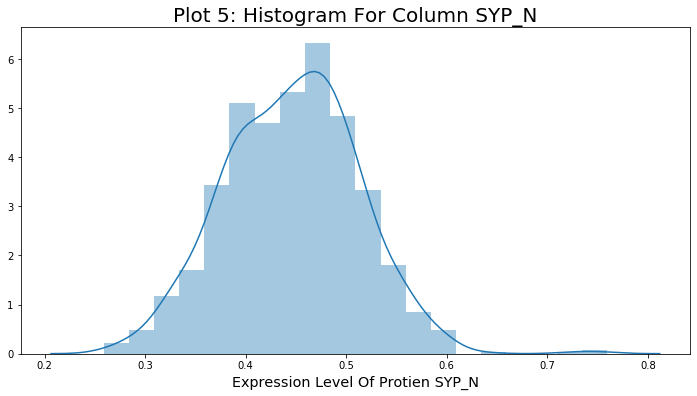

In [31]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['SYP_N'],
             kde=True,
             bins=20);
plt.title('Plot 5: Histogram For Column SYP_N', fontsize=20)
plt.xlabel('Expression Level Of Protien SYP_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `pS6_N`

* The average expression level of protein `SYP_N` is  **0.446073**.
* From the plot it is clear that column `SYP_N` is symmetric.

In [32]:
descriptive_stat(mice_protien_data['pS6_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.067254,0.158748,0.121521,0.067254,0.121626,0.014276


Text(0.5, 0, 'Expression Level Of Protien pS6_N')

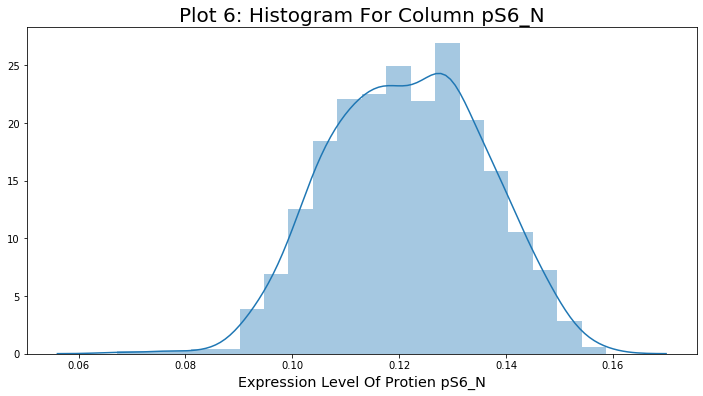

In [33]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['pS6_N'],
             kde=True,
             bins=20);
plt.title('Plot 6: Histogram For Column pS6_N', fontsize=20)
plt.xlabel('Expression Level Of Protien pS6_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `P3525_N`

* The average expression level of protein `P3525_N` is  **0.291276**.
* From the plot it is clear that column `P3525_N` is symmetric.

In [34]:
descriptive_stat(mice_protien_data['P3525_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.207438,0.443735,0.291276,0.207438,0.290646,0.030015


Text(0.5, 0, 'Expression Level Of Protien P3525_N')

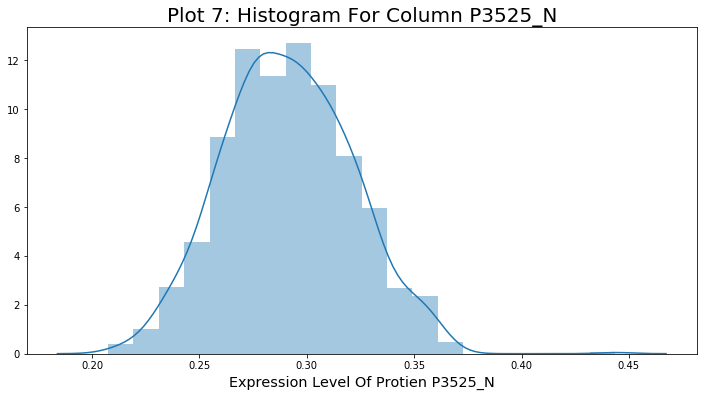

In [35]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['P3525_N'],
             kde=True,
             bins=20);
plt.title('Plot 7: Histogram For Column P3525_N', fontsize=20)
plt.xlabel('Expression Level Of Protien P3525_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `pCREB_N`

* The average expression level of protein `pCREB_N` is  **0.212574**.
* From the plot it is clear that column `pCREB_N` is symmetric.

In [36]:
descriptive_stat(mice_protien_data['pCREB_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.112812,0.306247,0.212574,0.212574,0.210681,0.032542


Text(0.5, 0, 'Expression Level Of Protien pCREB_N')

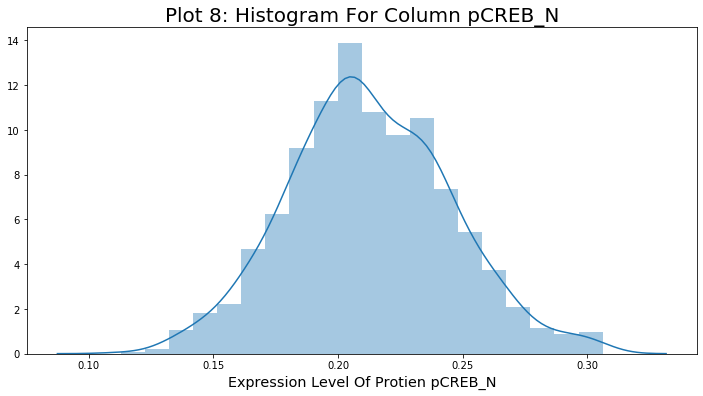

In [37]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['pCREB_N'],
             kde=True,
             bins=20);
plt.title('Plot 8: Histogram For Column pCREB_N', fontsize=20)
plt.xlabel('Expression Level Of Protien pCREB_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `PKCA_N`

* The average expression level of protein `PKCA_N` is  **0.317939**.
* From the plot it is clear that column `PKCA_N` is symmetric.

In [38]:
descriptive_stat(mice_protien_data['PKCA_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,0.191431,0.473992,0.317939,0.317939,0.313028,0.052164


Text(0.5, 0, 'Expression Level Of Protien PKCA_N')

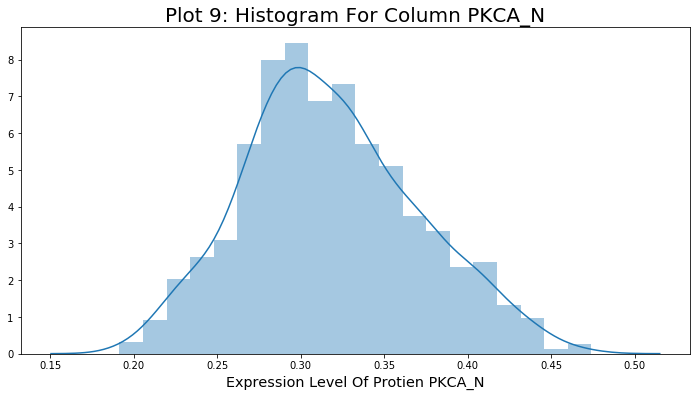

In [39]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['PKCA_N'],
             kde=True,
             bins=20);
plt.title('Plot 9: Histogram For Column PKCA_N', fontsize=20)
plt.xlabel('Expression Level Of Protien PKCA_N',fontsize='x-large')

### <span style="color:#008fb3">Exploring column `Bcatenin_N`

* The average expression level of protein `Bcatenin_N` is  **2.127149**.
* From the plot it is clear that column `Bcatenin_N` is symmetric.

In [40]:
descriptive_stat(mice_protien_data['Bcatenin_N'])

,MIN,MAX,MEAN,MODE,MEDIAN,SD
0,1.134886,3.680552,2.14655,2.14655,2.12714,0.432092


Text(0.5, 0, 'Expression Level Of Protien Bcatenin_N')

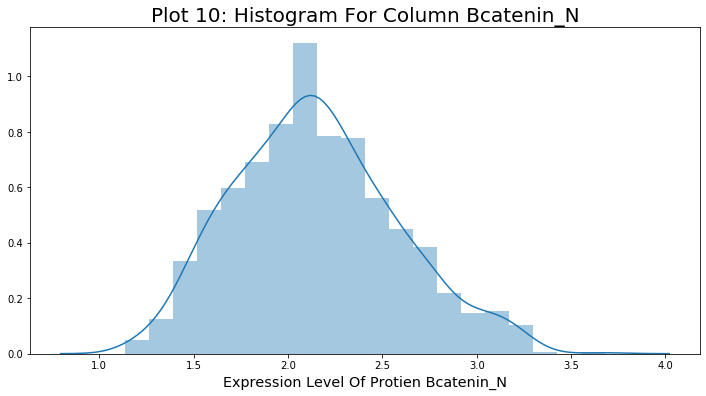

In [41]:
fig = plt.figure(figsize=[12,6])
sns.distplot(mice_protien_data['Bcatenin_N'],
             kde=True,
             bins=20);
plt.title('Plot 10: Histogram For Column Bcatenin_N', fontsize=20)
plt.xlabel('Expression Level Of Protien Bcatenin_N',fontsize='x-large')

# <span style="color:#008fb3">Task 2.2: Explore the relationship between pairs of attributes

## <span style="color:#008fb3">Relation between H3MeK4_N and CaNA_N

<code>Hypothesis: There is a positive correlation between protein **`H3MeK4_N`** and **`CaNA_N`**</code>

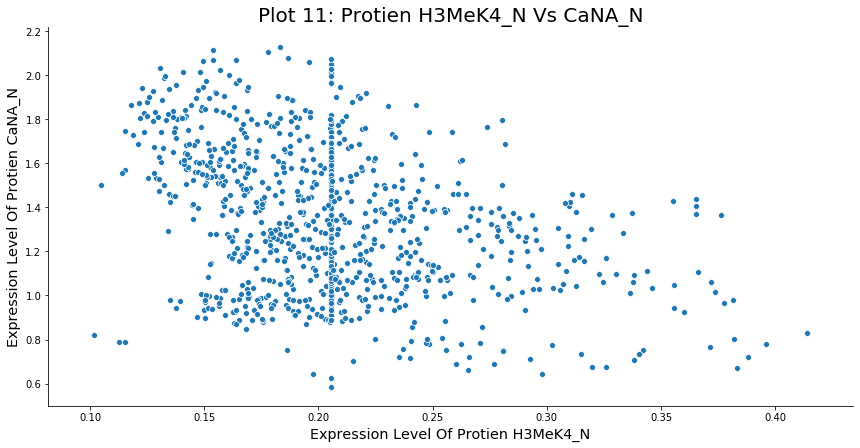

In [42]:
graph = sns.relplot(x="H3MeK4_N", y="CaNA_N", data=mice_protien_data,  
                    height=6,aspect=2)
plt.title('Plot 11: Protien H3MeK4_N Vs CaNA_N', fontsize = 20)
plt.xlabel('Expression Level Of Protien H3MeK4_N',fontsize='x-large')
plt.ylabel('Expression Level Of Protien CaNA_N',fontsize='x-large')
plt.show()

A scatter plot is plotted as shown in the plot 11 to find the relationship between protein `H3MeK4_N` and `CaNA_N`. From the plot 11, we can infer that there is **no correlation** between these 2 proteins. Thus, we can conclude that the result is against the hypothesis stated above.

## <span style="color:#008fb3">Relation between Protein `APP_N` by Class of Mice

<code>Hypothesis: Average expression level of protein `APP_N` is more for **trisomy class mice**</code>

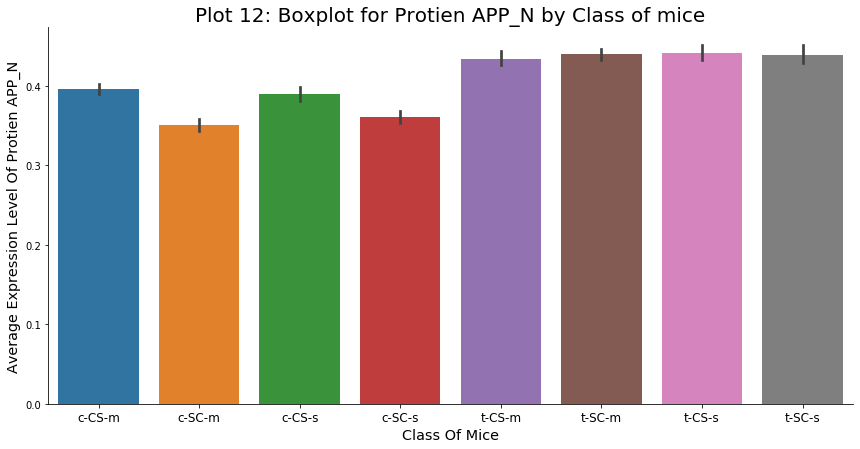

In [43]:
graph = sns.catplot(x= 'class', y='APP_N', data = mice_protien_data, kind = "bar", height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Plot 12: Boxplot for Protien APP_N by Class of mice', fontsize = 20)
plt.xlabel('Class Of Mice',fontsize='x-large')
plt.ylabel('Average Expression Level Of Protien APP_N',fontsize='x-large')
plt.show();

To find out the average expression level for protein `APP_N` with respect to class of mice, a bar plot is plotted as shown in plot 12.The bar plot illustrates that average expression level is more for class of type **trisomy** when compared to **control**.Thus, we can conclude that the above stated hypothesis is True.

## <span style="color:#008fb3">Relation between Protein `PKCA_N` by Class of Mice

<code>Hypothesis: Average expression level of protein **`PKCA_N`** is highest for mouse of type **c-SC-m**(control mice, not stimulated to learn, injected with memantine) </code>

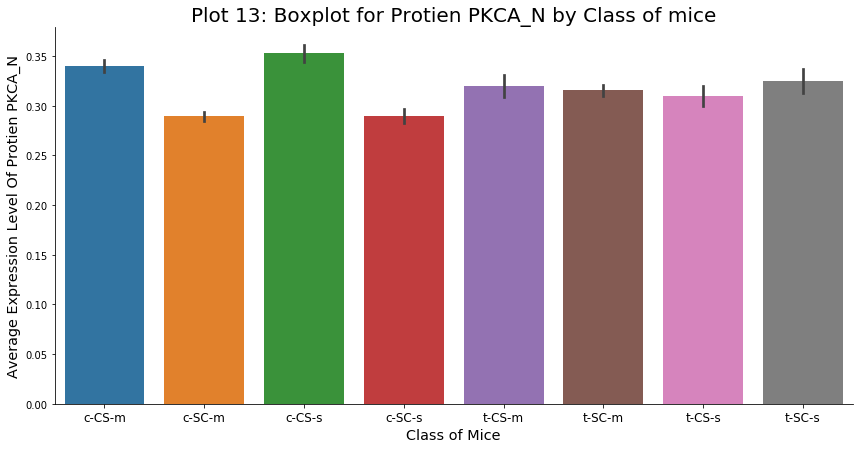

In [44]:
graph = sns.catplot(x= 'class', y='PKCA_N', data = mice_protien_data, kind = "bar", height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Plot 13: Boxplot for Protien PKCA_N by Class of mice', fontsize = 20)
plt.xlabel('Class of Mice',fontsize='x-large')
plt.ylabel('Average Expression Level Of Protien PKCA_N',fontsize='x-large')
plt.show();

To find out the average expression level for protein `PKCA_N` with respect to class of mice, a bar plot is plotted as shown in plot 13.The bar plot illustrates that average expression level is highest for class of micetype control mice, not stimulated to learn, injected with saline, **c-CS-s**. Thus we can conclude that result is against the above mentioned hypothesis.

## <span style="color:#008fb3">Relation between Protein `pBRAF_N` and `ADARB1_N`

<code>Hypothesis: There is a positive correlation between protein `pBRAF_N` and `ADARB1_N`</code>

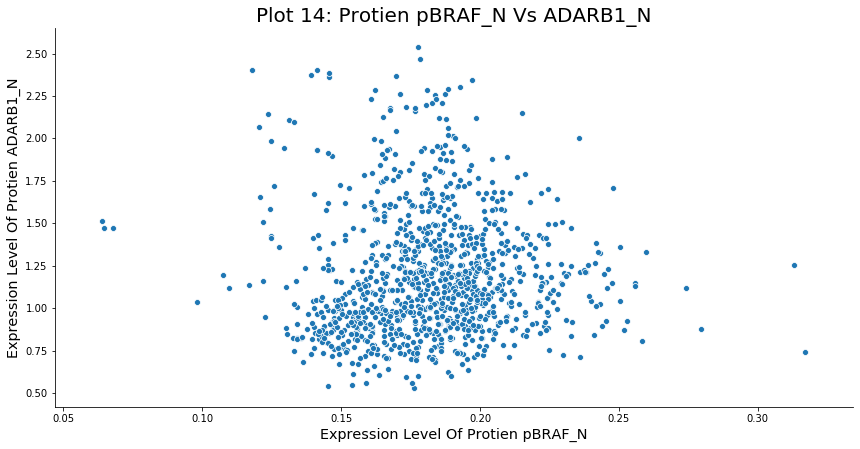

In [45]:
graph = sns.relplot(x="pBRAF_N", y="ADARB1_N", data=mice_protien_data,  
                    height=6,aspect=2)
plt.title('Plot 14: Protien pBRAF_N Vs ADARB1_N', fontsize = 20)
plt.xlabel('Expression Level Of Protien pBRAF_N',fontsize='x-large')
plt.ylabel('Expression Level Of Protien ADARB1_N',fontsize='x-large')
plt.show()

A scatter plot is plotted to find the relationship between protein `pBRAF_N` and `ADARB1_N`. From the plot 14, we can infer that there is no correlation between these 2 variables. Hence, above stated hypothesis is false. 

## <span style="color:#008fb3">Relation between Protein `pCREB_N` by Class of Mice

<code>Hypothesis: All the classes of mice type are Symmetric corresponding to Expression level of protein `pCREB_N`</code>

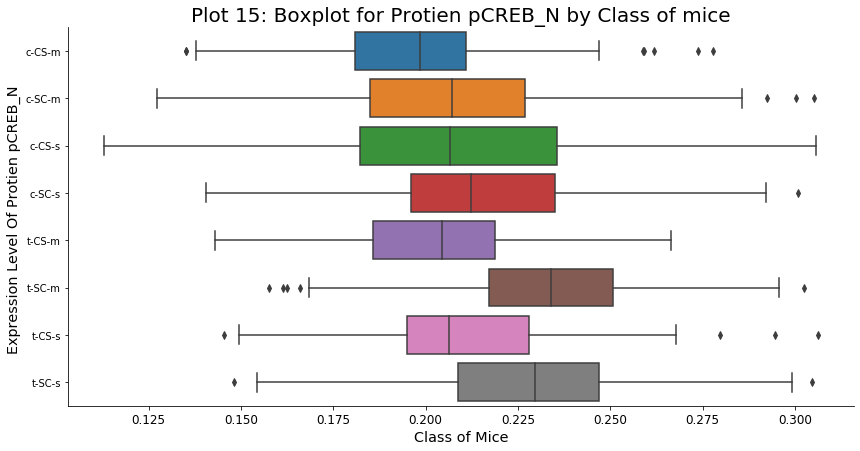

In [46]:
graph = sns.catplot(x= 'pCREB_N', y = 'class', data = mice_protien_data, kind = "box",height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.title('Plot 15: Boxplot for Protien pCREB_N by Class of mice', fontsize = 20)
plt.xlabel('Class of Mice',fontsize='x-large')
plt.ylabel('Expression Level Of Protien pCREB_N ',fontsize='x-large')
plt.show();

To check whether all the classes of mice type are symmetric , box plot is plotted for each type against expression level of protein `pCREB_N`. From the plot 15, it is infered that class **c-CS-m** and **t-CS-s** are skewed. Thus we can conclude that result is against the hypothis.

## <span style="color:#008fb3">Relation between Protein `JNK_N` and `ADARB1_N`

<code>Hypothesis: There is a positive correlation between protein **`JNK_N`** and **`MEK_N`**.</code>

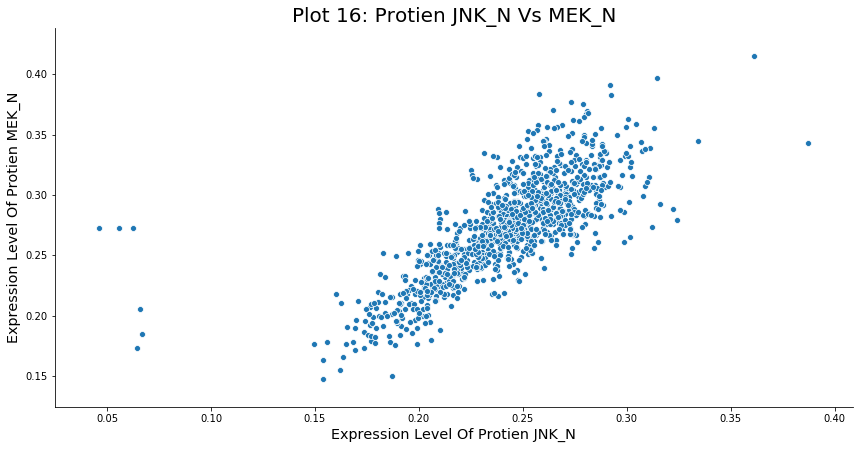

In [47]:
graph = sns.relplot(x="JNK_N", y="MEK_N", data=mice_protien_data,  
                    height=6,aspect=2, legend='brief')
plt.title('Plot 16: Protien JNK_N Vs MEK_N', fontsize = 20)
plt.xlabel('Expression Level Of Protien JNK_N',fontsize='x-large')
plt.ylabel('Expression Level Of Protien MEK_N',fontsize='x-large')
plt.show()

A scatter plot is plotted to find the relationship between protein `JNK_N` and `MEK_N`. From the plot 16, we can infer that there is high positive correlation between these 2 proteins. Hence, above stated hypothesis holds good.

## <span style="color:#008fb3">Relation between Protein `pAKT_N` by Class of Mice

<code>Hypothesis: Average expression level of protein **`pAKT_N`** is lowest for mouse of type **t-CS-m**(trisomy mice, stimulated to learn, injected with memantine)

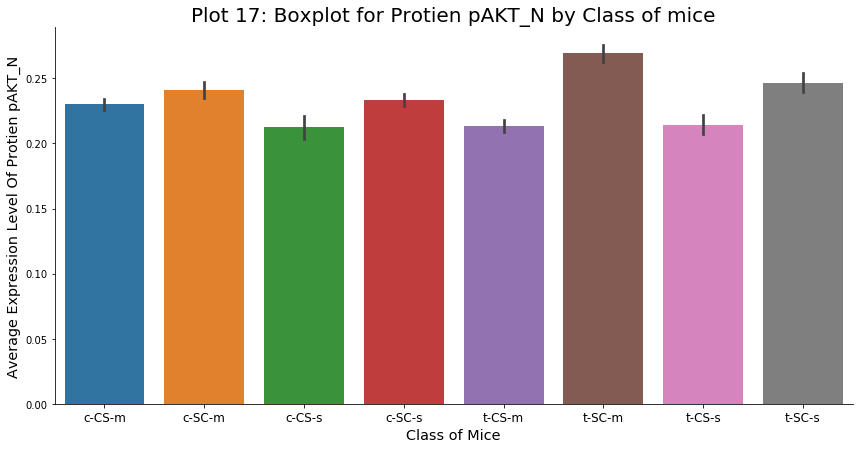

In [48]:
graph = sns.catplot(x= 'class', y='pAKT_N', data = mice_protien_data, kind = "bar", height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Plot 17: Boxplot for Protien pAKT_N by Class of mice', fontsize = 20)
plt.xlabel('Class of Mice',fontsize='x-large')
plt.ylabel('Average Expression Level Of Protien pAKT_N',fontsize='x-large')
plt.show();

To find out the lowest average expression level for protein pAKT_N with respect to class of mice, a bar plot is plotted as shown in plot 17.The bar plot illustrates that average expression level is highest for class of micetype **t-CS-m**. Thus we can conclude that result is against the above mentioned hypothesis.

## <span style="color:#008fb3">Relation between Protein `pMEK_N` and `ITSN1_N`

<code>Hypothesis: There is a positive correlation between protein **`pMEK_N`** and **`ITSN1_N`**.</code>

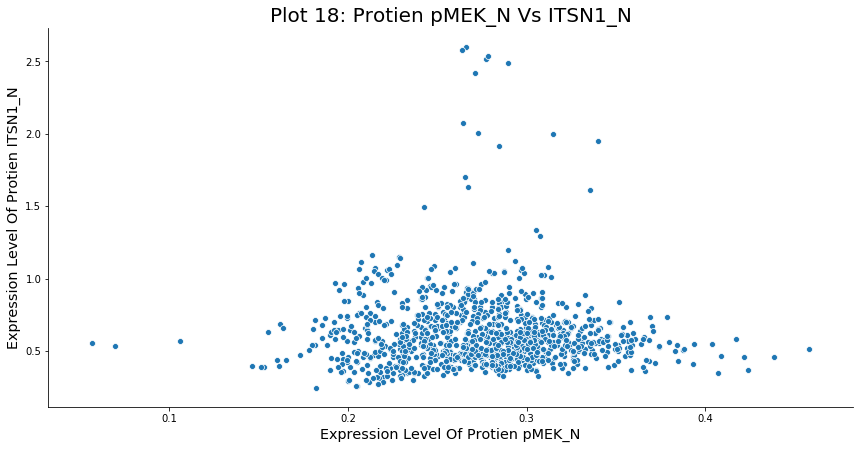

In [49]:
graph = sns.relplot(x="pMEK_N", y="ITSN1_N", data=mice_protien_data,  
                    height=6,aspect=2, legend='brief')
plt.title('Plot 18: Protien pMEK_N Vs ITSN1_N', fontsize = 20)
plt.xlabel('Expression Level Of Protien pMEK_N',fontsize='x-large')
plt.ylabel('Expression Level Of Protien ITSN1_N',fontsize='x-large')
plt.show()

A scatter plot is plotted as shown in the plot 18 to find the relationship between protein `pMEK_N` and `ITSN1_N`. From the plot 15, we can infer that there is no correlation between these 2 proteins. Thus, we can conclude
that the result is against the hypothesis stated above.

## <span style="color:#008fb3">Relation between Protein `pAKT_N` by Class of Mice

<code>Hypothesis: Average expression level of protein **`DYRK1A_N`** is highest for mouse of type **c-CS-m** (control mice, stimulated to learn, injected with memantine)

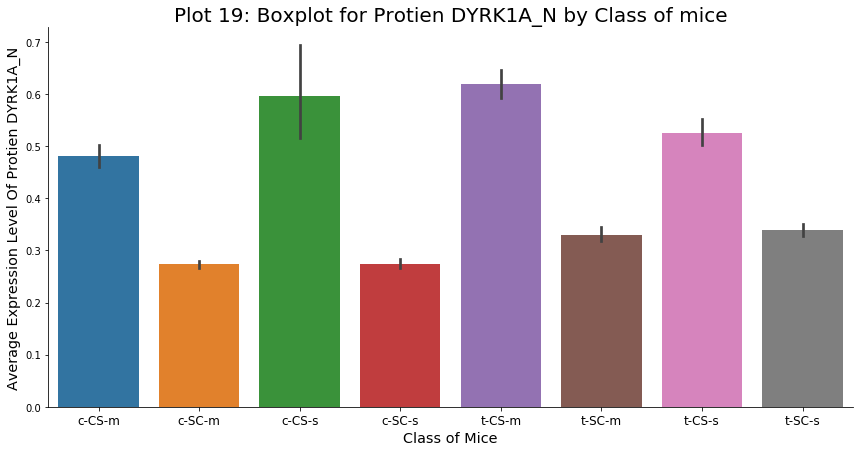

In [50]:
graph = sns.catplot(x= 'class', y='DYRK1A_N', data = mice_protien_data, kind = "bar", height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.title('Plot 19: Boxplot for Protien DYRK1A_N by Class of mice', fontsize = 20)
plt.xlabel('Class of Mice',fontsize='x-large')
plt.ylabel('Average Expression Level Of Protien DYRK1A_N',fontsize='x-large')
plt.show();

To find out the highest average expression level for protein DYRK1A_N with respect to class of mice, a bar plot is plotted as shown in plot 19.The bar plot illustrates that average expression level is highest for class of micetype **t-CS-m**. Thus we can conclude that result is against the above mentioned hypothesis.

## <span style="color:#008fb3">Relation between Protein `ITSN1_N` by Class of Mice

<code>Hypothesis: Average expression level of protein **`ITSN1_N`** is highest for mouse of type **t-CS-m** (trisomy mice, stimulated to learn, injected with memantine).

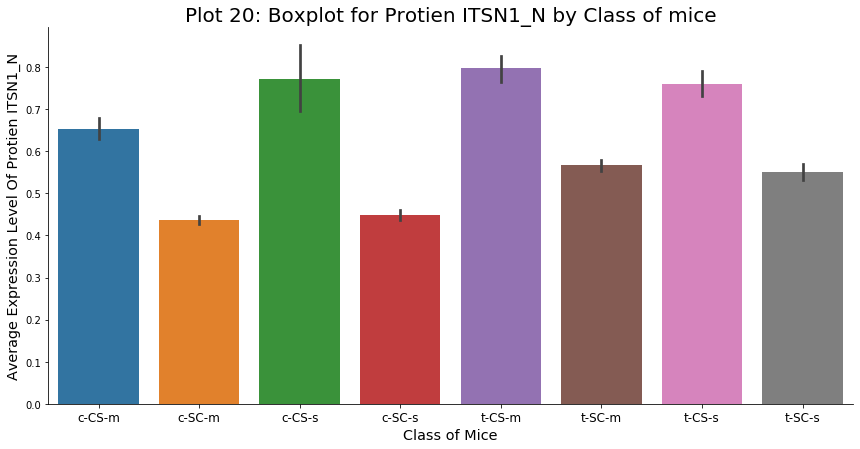

In [51]:
graph = sns.catplot(x= 'class', y='ITSN1_N', data = mice_protien_data, kind = "bar", height=6,aspect=2)
graph.set_xticklabels(rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Plot 20: Boxplot for Protien ITSN1_N by Class of mice', fontsize = 20)
plt.xlabel('Class of Mice',fontsize='x-large')
plt.ylabel('Average Expression Level Of Protien ITSN1_N',fontsize='x-large')
plt.show();
graph.savefig('fig1')

To find out the highest average expression level for protein ITSN1_N with respect to class of mice, a bar plot is plotted as shown in plot 20.The bar plot illustrates that average expression level is highest for class of micetype **t-CS-m**. Thus we can conclude that the above mentioned hypothesis holds good.

# <span style="color:#008fb3">Task 3: Data Modelling

## <span style="color:#008fb3">Removing Target from Data set

* Target column `class` is assigned to a variable **target**.
* A copy of data `mice_protien_data` is assigned to a data frame `Data` by dropping the target column `class` and other columns include `MouseID`,`Genotype`,`Treatment` and `Behavior`.
* Column `MouseID` is dropped from the data set as this column contains a unique value for each row, which is irrelevant in predictive modeling.
* Column `Genotype`,`Treatment` and `Behavior` are dropped as the research question is to determine the class of the mice from subsets of proteins.

In [52]:
target = mice_protien_data['class']
Data = mice_protien_data.drop(columns=['MouseID','class','Genotype','Treatment','Behavior'])
Data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


First 5 rows of `Data` are displayed using `head` method. Value counts of eight classes of mice are determined using `value_counts` function.

In [53]:
target.value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
t-SC-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

# <span style="color:#008fb3">Classifier 1 : K-Nearest Neighbors

A type of supervised learning algorithm that is used in classification problems.

### <span style="color:#008fb3">Feature Selection Using Hill Climbing

* To select the important features for predicting the target, the `Data` is passed to a hill climbing algorithm.
* `col_num` is set to 77, so that the maximum columns it can select will be all the columns of `Data` data frame.
* Hill climbing algorithm is predicted the number of features and it's corresponding accuracy score by using the **KNeighborsClassifier** K Nearest Neighbours Classifier with default paramters, which include:
    * n_neighbors=5,
    * weights='uniform',
    * p=2

In [54]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
new_Ind = []
cur_MaxScore = 0.0
top5Score = []
top5SelectedFeatures = []
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.3, stratify = target,random_state=999)
    clf = KNeighborsClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        top5Score.append(cur_Score)
        top5SelectedFeatures.append(new_Ind)
        
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.1388888888888889
Score with 2 selected features: 0.2191358024691358
Score with 3 selected features: 0.4104938271604938
Score with 4 selected features: 0.48148148148148145
Score with 5 selected features: 0.5154320987654321
Score with 6 selected features: 0.6111111111111112
Score with 7 selected features: 0.6697530864197531
Score with 8 selected features: 0.6944444444444444
Score with 9 selected features: 0.6975308641975309
Score with 10 selected features: 0.7654320987654321
Score with 11 selected features: 0.8209876543209876
Score with 12 selected features: 0.8240740740740741
Score with 13 selected features: 0.8518518518518519
Score with 14 selected features: 0.8549382716049383
Score with 15 selected features: 0.8703703703703703
Score with 16 selected features: 0.8765432098765432
Score with 17 selected features: 0.8888888888888888
Score with 18 selected features: 0.8888888888888888
Score with 19 selected features: 0.8981481481481481
Score with 20 select

In [55]:
features_detected = Data.columns[new_Ind]
features_detected

Index(['BDNF_N', 'GFAP_N', 'pP70S6_N', 'P70S6_N', 'GluR3_N', 'MTOR_N', 'P38_N',
       'pNR2A_N', 'CREB_N', 'pERK_N', 'Ubiquitin_N', 'pGSK3B_N', 'APP_N',
       'CDK5_N', 'AKT_N', 'BAD_N', 'Tau_N', 'DSCR1_N', 'RAPTOR_N', 'RSK_N',
       'PKCA_N', 'CaNA_N', 'ERBB4_N', 'JNK_N', 'ARC_N', 'pBRAF_N', 'IL1B_N',
       'pAKT_N', 'MEK_N', 'pPKCG_N', 'pNUMB_N', 'pS6_N', 'BRAF_N', 'pMEK_N',
       'SOD1_N', 'NUMB_N', 'BAX_N', 'P3525_N', 'H3AcK18_N', 'AMPKA_N',
       'pCASP9_N', 'CAMKII_N', 'pJNK_N', 'pCFOS_N', 'pCREB_N', 'RRP1_N',
       'SYP_N', 'SNCA_N'],
      dtype='object')

In [56]:
subsetForKnn = Data[Data.columns & features_detected]

From the output it is found that , Among 77 columns , 48 columns are required to get a accuracy score of **0.9722**.
* These features are detected and assigned to a variable `features_detected`.
* A subset of the data is created which includes the features detected from hill climbing and assigned to a data frame `subsetForKnn`.

# <span style="color:#008fb3">Training the Model

While training the Model, a majority of the observations are given for training and remaining observations are used to test the model. The observations used to evaluate a classifier must be different from the observations used to train the classifier, thus avoiding Overfitting. This is achieved by creating a two-separate subset for training and testing. This is done using `train_test_split` method.<br/>
For this purpose `subsetForKnn` data is split into training data and testing data in ratio **70** and **30** respectively, which is achieved by giving a value of 0.3 to `test_size`.<br/>
As there is a slight class imbalance, `stratify` is passed with target, to split the data to keep the proportion of target value counts similiar in train and test data.

In [57]:
D_train_KNN, D_test_KNN, t_train_KNN, t_test_KNN = train_test_split(subsetForKnn,target,test_size = 0.3, 
                                                    random_state=999,
                                                    stratify = target)

## <span style="color:#008fb3">Model Validation and selection

* The validation strategy used here is **k-folds cross-validation** as this strategy uses all the data available in the data set.
* K fold cross validation is imported from sklearn, this cross validation will split dataset into k consecutive folds.And then each fold is then used once as a validation while the k - 1 remaining folds form the training set.
* Here the K value is 5, as this will create fewer variations between folds and is quicker.
* Class accuracy for each fold is found and the classifier with optimal hyper parameters and best class accuracy is selected.

In [58]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=999, shuffle=True)

In [59]:
#run the KFlod cross validation
def knn_score_method(D_train,t_train,n,p_value,weight_value):
    knn_score = []
    for k, (train_index, test_index) in enumerate(kf.split(D_train)):
        X_train, X_test = D_train.iloc[train_index], D_train.iloc[test_index]
        y_train, y_test = t_train.iloc[train_index], t_train.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=n,p=p_value,weights=weight_value)
        knn_best_fit = clf.fit(X_train, y_train)
        knn_score.append(clf.score(X_test, y_test))
        print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    print("Mean Score =",np.mean(knn_score))
    return knn_best_fit, np.mean(knn_score)

A function `knn_score_method` is defined which will accept the 
   * `D_train` Descriptive features
   * `t_train` It's corresponding target
   * `n` Knn nearest neighbours
   * `p_value` which is the distance metric
   * `weight_value` weight used in prediction 
The above mentioned function will perform the k-fold cross validation on K Nearest neighbour classifier using the values passed.

The `knn_score_method` is passed with default paramters of KNN Classifier and accuracy of **0.85187** is obtained.

In [60]:
knn_score_method(D_train_KNN, t_train_KNN,5,2,'uniform')

[fold 0] score: 0.91447
[fold 1] score: 0.94040
[fold 2] score: 0.95364
[fold 3] score: 0.92715
[fold 4] score: 0.91391
Mean Score = 0.9299146043917741


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'), 0.9299146043917741)

## <span style="color:#008fb3">Hyper Parameter Tuning

* To select the appropriate values for each paramters of K Nearest neighbour classifier, a combination of values are passed.
    1. Nearest Neighbour : `neigh_list` is given value of 1,2,3,4,5,10,15,20,25 and 30. As the data set contains 1080 observations. As a general rule the maximum value for nearest neighbour is given the square root of the total number of observations.
    2. Distance Metric : `p` is given a value of 1 and 2. Here P of value 5 is not passed because of the dimensionality of the data set.For high dimensional vectors, a small p value might be better,The lower the p the less relevant a high difference.
    3. Weight : weight function used in prediction. Both `uniform` and `distance` are used.<br/>
        Possible values:<br/>
        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.<br/>
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point          will have a greater influence than neighbors which are further away.

In [61]:
neigh_list = [1,2,3,4,5,10,15,20,25,30]
p = [1,2]
accuracy_score_list = []
p_list = []
k_list = []
weight_list = []
print("\n ******************************** K-Nearest Algorithm ********************************")
for i in neigh_list:
    print("\n ******************************** K =",i," ********************************")
    print("\n Accuracy score for the value K = : ",i," P = 1 and Weight : uniform")
    temp , score = knn_score_method(D_train_KNN,t_train_KNN,i,1,'uniform')
    k_list.append(i)
    p_list.append(1)
    weight_list.append('uniform')
    accuracy_score_list.append(score)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value K = : ",i," P = 1 and Weight : distance")
    temp1 , score1 = knn_score_method(D_train_KNN,t_train_KNN,i,1,'distance')
    k_list.append(i)
    p_list.append(1)
    weight_list.append('distance')
    accuracy_score_list.append(score1)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value K = : ",i," P = 2 and Weight : uniform")
    temp2 , score2 = knn_score_method(D_train_KNN,t_train_KNN,i,2,'uniform')
    k_list.append(i)
    p_list.append(2)
    weight_list.append('uniform')
    accuracy_score_list.append(score2)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value K = : ",i," P = 2 and Weight : distance")
    temp3, score3 = knn_score_method(D_train_KNN,t_train_KNN,i,2,'distance')
    k_list.append(i)
    p_list.append(2)
    weight_list.append('distance')
    accuracy_score_list.append(score3)
    print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


 ******************************** K-Nearest Algorithm ********************************

 ******************************** K = 1  ********************************

 Accuracy score for the value K = :  1  P = 1 and Weight : uniform
[fold 0] score: 0.98684
[fold 1] score: 0.96689
[fold 2] score: 0.99338
[fold 3] score: 0.99338
[fold 4] score: 0.98675
Mean Score = 0.9854478912513072

 Accuracy score for the value K = :  1  P = 1 and Weight : distance
[fold 0] score: 0.98684
[fold 1] score: 0.96689
[fold 2] score: 0.99338
[fold 3] score: 0.99338
[fold 4] score: 0.98675
Mean Score = 0.9854478912513072

 Accuracy score for the value K = :  1  P = 2 and Weight : uniform
[fold 0] score: 0.99342
[fold 1] score: 0.97351
[fold 2] score: 0.99338
[fold 3] score: 0.99338
[fold 4] score: 0.98013
Mean Score = 0.9867636807249912

 Accuracy score for the value K = :  1  P = 2 and Weight : distance
[fold 0] score: 0.99342
[fold 1] score: 0.97351
[fold 2] score: 0.99338
[fold 3] score: 0.99338
[fold 4] sc

After the combination of paramters are passed for `knn_score_method`, accuracy for each loop is stored into a data frame `score_df_KNN`. First 5 rows is displayed using `head` function.

In [62]:
score_df_KNN = pd.DataFrame()
score_df_KNN['n_neighbors'] = k_list
score_df_KNN['Distance'] = p_list
score_df_KNN['Weight'] = weight_list
score_df_KNN['Accuracy'] = accuracy_score_list
score_df_KNN['Accuracy'] = score_df_KNN['Accuracy'].round(3)
score_df_KNN.head()

,n_neighbors,Distance,Weight,Accuracy
0,1,1,uniform,0.985
1,1,1,distance,0.985
2,1,2,uniform,0.987
3,1,2,distance,0.987
4,2,1,uniform,0.972


In [63]:
score_df_KNN.shape

(40, 4)

The total of 40 combination is passed through the above mentioned for loop, The knn paramters value is found for the maximum accuracy rate from the `score_df_KNN` data frame.  

In [64]:
max_accuracy = score_df_KNN[score_df_KNN['Accuracy'] == max(score_df_KNN['Accuracy'])]
index_value = max_accuracy[:1].index[0]
max_accuracy[:1]

,n_neighbors,Distance,Weight,Accuracy
2,1,2,uniform,0.987


For evaluation of the classifier , the model which gave the maximum accuracy is assigned to a variab

In [65]:
clf_KNN = KNeighborsClassifier(n_neighbors=max_accuracy['n_neighbors'][index_value],
                               p=max_accuracy['Distance'][index_value],
                               weights=max_accuracy['Weight'][index_value])
best_fit_KNN = clf_KNN.fit(D_train_KNN,t_train_KNN)
best_fit_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

From the output , the classifier is giving highest accuracy of **0.987** for 
   * `N-neighbours` : **1**
   * `Distance` : **2** (euclidean_distance)
   * `Weight` : **uniform**

# <span style="color:#008fb3">Classifier 2 :Decision Tree

A type of supervised learning algorithm that is used in classification problems.

### Feature Selection Using Hill Climbing

* To select the important features for predicting the target, the `Data` is passed to a hill climbing algorithm.
* `col_num` is set to 77, so that the maximum columns it can select will be all the columns of `Data` data frame.
* Hill climbing algorithm is predicted the number of features and it's corresponding accuracy score by using the `DecisionTreeClassifier` method with default paramters, which include:
    * criterion='gini',The function to measure the quality of a split,
    * max_depth=None,The maximum depth of the tree.
    * min_samples_split=2, The minimum number of samples required to split an internal node

In [66]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
new_Ind = []
cur_MaxScore = 0.0
top5Score = []
top5SelectedFeatures = []
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.3, stratify = target,random_state=999)
    clf = DecisionTreeClassifier(random_state=999)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        top5Score.append(cur_Score)
        top5SelectedFeatures.append(new_Ind)
        
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.1697530864197531
Score with 2 selected features: 0.18518518518518517
Score with 3 selected features: 0.39197530864197533
Score with 4 selected features: 0.4691358024691358
Score with 5 selected features: 0.5432098765432098
Score with 6 selected features: 0.595679012345679
Score with 7 selected features: 0.6018518518518519
Score with 8 selected features: 0.6419753086419753
Score with 9 selected features: 0.7067901234567902
Score with 10 selected features: 0.7283950617283951
Score with 11 selected features: 0.7314814814814815
Score with 12 selected features: 0.7438271604938271
Score with 13 selected features: 0.7746913580246914
Score with 14 selected features: 0.7746913580246914
Score with 15 selected features: 0.7932098765432098
Score with 16 selected features: 0.8395061728395061
Score with 17 selected features: 0.8395061728395061
Score with 18 selected features: 0.8425925925925926


In [67]:
features_detectedDT = Data.columns[new_Ind]
features_detectedDT

Index(['BDNF_N', 'GFAP_N', 'pP70S6_N', 'P70S6_N', 'GluR3_N', 'MTOR_N', 'P38_N',
       'pNR2A_N', 'pERK_N', 'pRSK_N', 'CDK5_N', 'PSD95_N', 'GSK3B_N',
       'ITSN1_N', 'IL1B_N', 'pCAMKII_N', 'pJNK_N', 'pCFOS_N'],
      dtype='object')

In [68]:
subsetForDT = Data[Data.columns & features_detectedDT]

From the output it is found that , Among 77 columns , 18 columns are required to get a accuracy score of **0.8425**.
* These features are detected and assigned to a variable `features_detected`.
* A subset of the data is created which includes the features detected from hill climbing and assigned to a data frame `subsetForDT`.

# <span style="color:#008fb3">Training the Model

As mentioned above, While training the Model, a majority of the observations are given for training and remaining observations are used to test the model. The observations used to evaluate a classifier must be different from the observations used to train the classifier, thus avoiding Overfitting. This is achieved by creating a two-separate subset for training and testing. This is done using `train_test_split` method.<br/>
For this purpose `subsetForDT` data is split into training data and testing data in ratio **70** and **30** respectively, which is achieved by giving a value of 0.3 to `test_size`.<br/>
As there is a slight class imbalance, `stratify` is passed with target, to split the data to keep the proportion of target value counts similiar in train and test data.

In [69]:
subsetForDT = Data[Data.columns & features_detected]
D_train_DT, D_test_DT, t_train_DT, t_test_DT = train_test_split(subsetForDT,target,test_size = 0.3, 
                                                    random_state=999,
                                                    stratify = target)

# <span style="color:#008fb3">Model Validation and selection¶

* The validation strategy used here is k-folds cross-validation as this strategy uses all the data available in the data set.

* K fold cross validation is imported from sklearn, this cross validation will split dataset into k consecutive folds.And then each fold is then used once as a validation while the k - 1 remaining folds form the training set.

* Here the K value is 5, as this will create fewer variations between folds and is quicker.

* Class accuracy for each fold is found and the classifier with optimal hyper parameters and best class accuracy is selected.

In [70]:
#run the KFlod cross validation
def DT_score_method(D_train,t_train,criterion,depth,sample):
    dt_score = []
    for k, (train_index, test_index) in enumerate(kf.split(D_train)):
        X_train, X_test = D_train.iloc[train_index], D_train.iloc[test_index]
        y_train, y_test = t_train.iloc[train_index], t_train.iloc[test_index]
        clf_dt = DecisionTreeClassifier(criterion=criterion , max_depth=depth, min_samples_split=sample,
                                        random_state = 999)
        dt_best_fit = clf_dt.fit(X_train, y_train)
        dt_score.append(clf_dt.score(X_test, y_test))
        print("[fold {0}] score: {1:.5f}".format(k, clf_dt.score(X_test, y_test)))
    print("Mean Score =",np.mean(dt_score))
    return dt_best_fit, np.mean(dt_score)

A function `DT_score_method` is defined which will accept the 
   * `D_train` Descriptive features,
   * `t_train` It's corresponding target,
   * `criterion` The function to measure the quality of a split,
   * `depth` The maximum depth of the tree.
   * `sample` The minimum number of samples required to split an internal node 
The above mentioned function will perform the k-fold cross validation on K Nearest neighbour classifier using the values passed.

The `DT_score_method` is passed with default paramters of Decision Tree Classifier and accuracy of **0.7843** is obtained.

In [71]:
DT_score_method(D_train_DT,t_train_DT,'gini',None,2)

[fold 0] score: 0.82237
[fold 1] score: 0.75497
[fold 2] score: 0.79470
[fold 3] score: 0.74172
[fold 4] score: 0.80795
Mean Score = 0.7843412338794005


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=999, splitter='best'), 0.7843412338794005)

## <span style="color:#008fb3">Hyper Parameter Tuning

* To select the appropriate values for each paramters of Decision Tree classifier, a combination of values are passed.
    1. `criterion` : The function to measure the quality of a split is given value of **gini** and **entropy**. **gini** is used to create binary splits and **entropy** is used for the information gain.
    2. `The maximum depth of the tree`: is given a value of 5,10,15,20 and 25, Used to control overfitting as higher depth will allow model to learn relations very specific to a particular sample.
    3. `Minimum samples for a node split` : given a value of 2,3 and 5, which defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. Constraint is given to avoid overfitting as Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting, therefore it should be tuned using cross-validation.

In [72]:
maximum_depth = [5,10,15,20,25]
accuracy_score_list_Dt = []
maximum_depth_list = []
split_criterion_list = []
min_samples_split = []
print("\n ******************************** Decision Tree Algorithm ********************************")
for i in maximum_depth:
    print("\n ******************************** Max Depth =",i," ********************************")
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'entropy' and min_samples_split = 2")
    temp , score = DT_score_method(D_train_DT,t_train_DT,'entropy',i,2)
    maximum_depth_list.append(i)
    split_criterion_list.append('entropy')
    min_samples_split.append(2)
    accuracy_score_list_Dt.append(score)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'entropy' and min_samples_split = 3")
    temp1 , score1 = DT_score_method(D_train_DT,t_train_DT,'entropy',i,3)
    maximum_depth_list.append(i)
    split_criterion_list.append('entropy')
    min_samples_split.append(3)
    accuracy_score_list_Dt.append(score1)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'entropy' and min_samples_split = 5")
    temp2 , score2 = DT_score_method(D_train_DT,t_train_DT,'entropy',i,5)
    maximum_depth_list.append(i)
    split_criterion_list.append('entropy')
    min_samples_split.append(5)
    accuracy_score_list_Dt.append(score2)
    #print("------------------------------------------------------------------------------------")
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'gini' and min_samples_split = 2")
    temp3, score3 = DT_score_method(D_train_DT,t_train_DT,'entropy',i,2)
    maximum_depth_list.append(i)
    split_criterion_list.append('gini')
    min_samples_split.append(2)
    accuracy_score_list_Dt.append(score3)
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'gini' and min_samples_split = 3")
    temp4, score4 = DT_score_method(D_train_DT,t_train_DT,'entropy',i,3)
    maximum_depth_list.append(i)
    split_criterion_list.append('gini')
    min_samples_split.append(3)
    accuracy_score_list_Dt.append(score3)
    print("\n Accuracy score for the value Max Depth = : ",i," criterion = 'gini' and min_samples_split = 5")
    temp4, score4 = DT_score_method(D_train_DT,t_train_DT,'entropy',i,5)
    maximum_depth_list.append(i)
    split_criterion_list.append('gini')
    min_samples_split.append(5)
    accuracy_score_list_Dt.append(score3)
    print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


 ******************************** Decision Tree Algorithm ********************************

 ******************************** Max Depth = 5  ********************************

 Accuracy score for the value Max Depth = :  5  criterion = 'entropy' and min_samples_split = 2
[fold 0] score: 0.69737
[fold 1] score: 0.78146
[fold 2] score: 0.78146
[fold 3] score: 0.72185
[fold 4] score: 0.75497
Mean Score = 0.7474207040780759

 Accuracy score for the value Max Depth = :  5  criterion = 'entropy' and min_samples_split = 3
[fold 0] score: 0.69737
[fold 1] score: 0.78146
[fold 2] score: 0.78146
[fold 3] score: 0.72185
[fold 4] score: 0.75497
Mean Score = 0.7474207040780759

 Accuracy score for the value Max Depth = :  5  criterion = 'entropy' and min_samples_split = 5
[fold 0] score: 0.69737
[fold 1] score: 0.78146
[fold 2] score: 0.78146
[fold 3] score: 0.72185
[fold 4] score: 0.75497
Mean Score = 0.7474207040780759

 Accuracy score for the value Max Depth = :  5  criterion = 'gini' and min_sa

In [73]:
score_df_DT = pd.DataFrame()
score_df_DT['Max_Depth'] = maximum_depth_list
score_df_DT['Split-Criterion'] = split_criterion_list
score_df_DT['min_samples_split'] = min_samples_split
score_df_DT['Accuracy'] = accuracy_score_list_Dt
#score_df_DT['Accuracy'] = score_df['Accuracy'].round(3)
score_df_DT.head()

,Max_Depth,Split-Criterion,min_samples_split,Accuracy
0,5,entropy,2,0.747421
1,5,entropy,3,0.747421
2,5,entropy,5,0.747421
3,5,gini,2,0.747421
4,5,gini,3,0.747421


In [74]:
score_df_DT.shape

(30, 4)

The total of 30 combination is passed through the above mentioned loop, The Decision Tree paramters value is found for the maximum accuracy rate from the `score_df_DT` data frame.  

In [75]:
max_accuracy_DT = score_df_DT[score_df_DT['Accuracy'] == max(score_df_DT['Accuracy'])]
index_value = max_accuracy_DT[:1].index[0]
max_accuracy_DT[:1]

,Max_Depth,Split-Criterion,min_samples_split,Accuracy
13,15,entropy,3,0.830699


From the output ,it is found that the Decision tree classifier is giving highest accuracy of **0.830699** for 
   * `Max Depth` : **15**
   * `Criterion` : **entropy**
   * `Minimum Sample Split` : **3**

For evaluation of the classifier , the model which gave the maximum accuracy is assigned to a variable `best_fit_clf_DT`

In [76]:
clf_dt_best = DecisionTreeClassifier(criterion=max_accuracy_DT['Split-Criterion'][index_value] ,
                                     max_depth=max_accuracy_DT['Max_Depth'][index_value], 
                                     min_samples_split=max_accuracy_DT['min_samples_split'][index_value],
                                     random_state = 999)
best_fit_DT = clf_dt_best.fit(D_train_DT,t_train_DT)

# <span style="color:#008fb3">Applying the trained model to unseen future data

## <span style="color:#008fb3">Evaluating Classifier 1 : K-Nearest Neighbors

* The test data `D_test_KNN` is fitted with the model, which gave a highest accuracy score on train data.
* `pred_knn`, predicted target values is found by fitting the model on test data. This predicted target value is compared with the actual target values.
* A **confusion matrix** is created based on the `pred_knn` and `t_test_KNN`. From the confusion matrix it is clear that the `best_fit_knn` has a good predictive power.
* Further when the model is fit on test data and target , accuracy score of **0.9907** is obtained. Further error classification rate is **0.0092**.

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred_knn = best_fit_KNN.predict(D_test_KNN)
cm = confusion_matrix(t_test_KNN, pred_knn)
print(cm)

[[45  0  0  0  0  0  0  0]
 [ 0 38  0  0  1  2  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 40]]


In [78]:
scoreOnTest = best_fit_KNN.score(D_test_KNN,t_test_KNN)
scoreOnTest

0.9907407407407407

In [79]:
error_rate_KNN = 1 - scoreOnTest
error_rate_KNN

0.0092592592592593

* From the **Classification Report** it can be infered that for class `c-CS-m`, `c-CS-s`,`c-SC-s`,`t-CS-m`,`t-SC-m` and `t-SC-s` has a precision score of **1.00**. 
* **Recall** : Except for the class `c-CS-s` ,which has a recall score of **0.93**, Rest of the classes have a recall score of **1.00**
* **F1-Score** : For 2 classes `c-CS-m `, `c-SC-m`, `c-SC-s`, `t-SC-m` and `t-SC-s`, a F1-Score of **1.0** is obtained, and for classes `t-SC-s` and `t-CS-m` a F1-Score of **1.00** is found.
* Overall the KNN weighted F1-Score is **0.99**.

In [80]:
print(classification_report(t_test_KNN,pred_knn))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        45
      c-CS-s       1.00      0.93      0.96        41
      c-SC-m       1.00      1.00      1.00        45
      c-SC-s       1.00      1.00      1.00        41
      t-CS-m       0.98      1.00      0.99        40
      t-CS-s       0.94      1.00      0.97        31
      t-SC-m       1.00      1.00      1.00        41
      t-SC-s       1.00      1.00      1.00        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



## <span style="color:#008fb3">Evaluating Classifier 2 : Decision Tree

* The test data `D_test_DT` is fitted with the model, which gave a highest accuracy score on train data(`best_fit_DT`).
* `pred_DT`, predicted target values is found by fitting the model on test data. This predicted target value is compared with the actual target values.
* A **confusion matrix** is created based on the `pred_DT` and `t_test_DT`. From the confusion matrix it is clear that the `best_fit_DT` has a fair predictive power.
* Further when the model is fit on test data and target , accuracy score of **0.784** is obtained. Further error classification rate is **0.216**.

In [81]:
pred_DT = best_fit_DT.predict(D_test_DT)
pd.crosstab(t_test_DT,pred_DT)
cm = confusion_matrix(t_test_DT, pred_DT)
print(cm)

[[38  3  2  0  2  0  0  0]
 [ 3 26  0  0  8  4  0  0]
 [ 0  0 41  2  0  0  2  0]
 [ 0  0  4 30  0  0  6  1]
 [ 4  2  0  0 27  7  0  0]
 [ 2  4  0  0  3 22  0  0]
 [ 0  0  5  1  0  0 35  0]
 [ 0  0  4  0  0  0  1 35]]


In [82]:
scoreOnTest_DT = best_fit_DT.score(D_test_DT,t_test_DT)
scoreOnTest_DT.round(3)

0.784

In [83]:
error_rate_KNN = 1 - scoreOnTest_DT
error_rate_KNN.round(3)

0.216

* From the **Classification Report** it can be infered that higesht precision is for class `t-SC-s` with the precision score of **0.97**.
* **Recall** : Average recall score is **0.78**. Least is for the class `c-CS-s` with the recall value of **0.63**.
* **F1-Score** : For class  `t-SC-s` f1-score of **0.92** is obtained which is highest and for class `c-CS-s` and `t-CS-m`, a F1-Score of **0.68** is obtained, which is lowest when compared to other class F1-Score.
* Overall the DT weighted F1-Score is **0.78**.

In [84]:
print(classification_report(t_test_DT,pred_DT))

              precision    recall  f1-score   support

      c-CS-m       0.81      0.84      0.83        45
      c-CS-s       0.74      0.63      0.68        41
      c-SC-m       0.73      0.91      0.81        45
      c-SC-s       0.91      0.73      0.81        41
      t-CS-m       0.68      0.68      0.68        40
      t-CS-s       0.67      0.71      0.69        31
      t-SC-m       0.80      0.85      0.82        41
      t-SC-s       0.97      0.88      0.92        40

    accuracy                           0.78       324
   macro avg       0.79      0.78      0.78       324
weighted avg       0.79      0.78      0.78       324



# <span style="color:#008fb3">Conclusion 

* From the above classification report, it is infered that the when **KNN Classifier** is fit on unseen data , a accuracy score of **0.99** is found where as **Decision Tree Classifier** got a accuracy score of **0.78**.
* Further `error classification rate` for KNN and Decision Tree classifier are **0.0092** and **0.216** respectively.
*  While working with continuous numerical variables, a decision tree **looses information** when it categorizes variables in different categories. Since all the descriptive features are continuous in the data set it is not a good option to opt for Decision Tree.
* In conclusion, based on the accuracy , confusion matrix and as data set contains continuous descriptive features, **K-Nearest Neighbour**  is the best classifier for acheiving the objective over Decision Tree classifier.

# <span style="color:#008fb3">Recommendation

* The data set had many outliers, which is can be transformed using log transformation for better predictive power and accuracy. Scaling can be applied on the data, so the data will be normalized. Hence better predictive power.
* Further hyperparameter tuning of KNN classifier can be done, and other classifier can be tried to get better accuracy.